In [2]:
#ex 1a

t = var('t')
x = function('x')(t)
k = var('k')
x0 = var('x0')

In [3]:
de = diff(x, t) + k * x == 0

In [7]:
initial_condition = [0, x0]

In [10]:
solution = desolve(de, x, ics = initial_condition, ivar=t)

In [11]:
solution

x0*e^(-k*t)

In [29]:
#ex 1b

def radioactive_decay_solution(t,x0, k):
    return x0 * exp(-k*t)

In [14]:
t_values = srange(0, 10, 0.1)

In [15]:
k_values = [0.1,0.5,1.0]
x0_values = [1,2,5]

In [30]:
p = Graphics()

In [32]:
for k_val in k_values:
    for x0_val in x0_values:
        label = f'x0={x0_val}, k={k_val}'
        p += plot(radioactive_decay_solution(t, x0_val, k_val), (t, 0, 10), legend_label=label)



Text(0.5, 0, 'Time t')

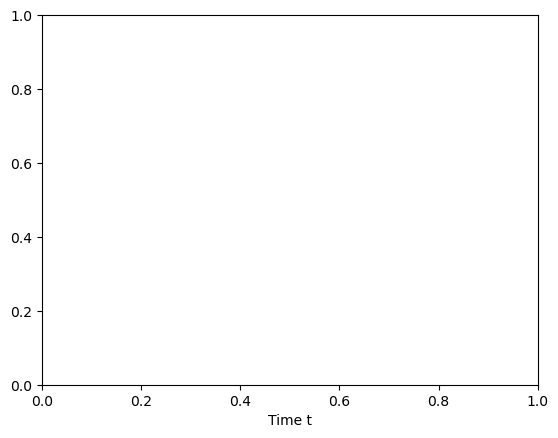

In [33]:
plt.xlabel('Time t')

Text(0, 0.5, 'x(t)')

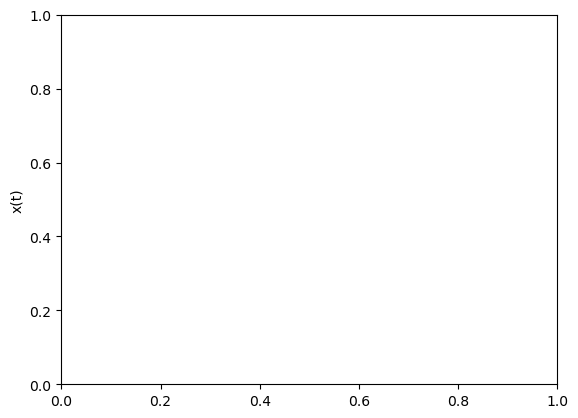

In [34]:
plt.ylabel('x(t)')

In [35]:
p.title('Radioaktiver Zerfall für verschiedene Werte von k und x0')

AttributeError: 'Graphics' object has no attribute 'title'

In [36]:
p.legend(True)
|

SyntaxError: invalid syntax (1329042392.py, line 2)

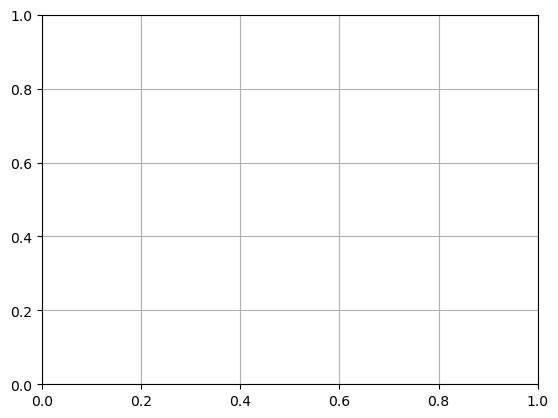

In [26]:
plt.grid(True)


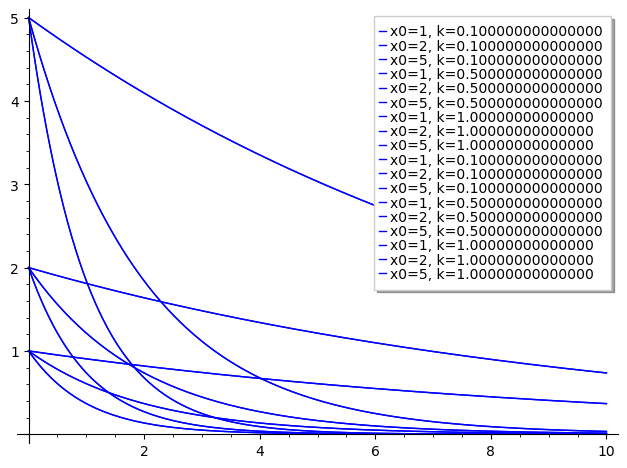

In [37]:
p.show()


In [38]:
p.set_legend_options(loc='upper right')
p.axes_labels(['Time $t$', '$x(t)$'])

In [39]:
title = text('Radioaktiver Zerfall für verschiedene Werte von $k$ und $x_0$', (5, 6), fontsize=12)
p += title

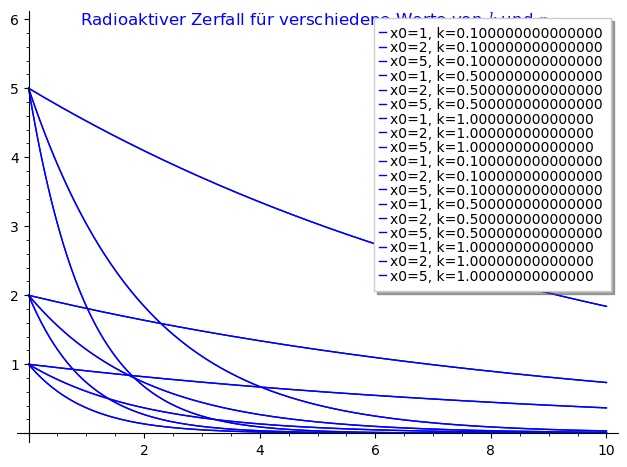

In [40]:
p.show()


In [42]:
# ex2 a

t = var('t')
T = function('T')(t)
k, Tu, T0 = var('k Tu T0')


In [43]:
de = diff(T, t) + k * (T - Tu) == 0


In [45]:
initial_condition = {T: T0}

In [47]:
solution = desolve(de, T, ics=initial_condition, ivar=t)

In [48]:
solution

(Tu*e^(k*t) + _C)*e^(-k*t)

In [49]:
#ex2 b
def newtonsches_abkuehlungsgesetz(t, k_val, Tu_val, T0_val):
    return T0_val * exp(-k_val * t)+ Tu_val * (1 - exp(-k_val * t))

In [51]:
t_values = srange(0,10,0.1)

In [52]:
k_values = [0.1, 0.5, 1.0]
Tu_values = [10, 20, 30]
T0_values = [50, 60, 70]

In [53]:
p = Graphics()

In [54]:
for k_val in k_values:
    for Tu_val in Tu_values:
        for T0_val in T0_values:
            T_values = [newtonsches_abkuehlungsgesetz(t, k_val, Tu_val, T0_val) for t in t_values]
            p += line(zip(t_values, T_values), color='blue')


In [55]:
p.axes_labels(['Zeit $t$','Temperatur $T(t)$'])

In [56]:
p.legend(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


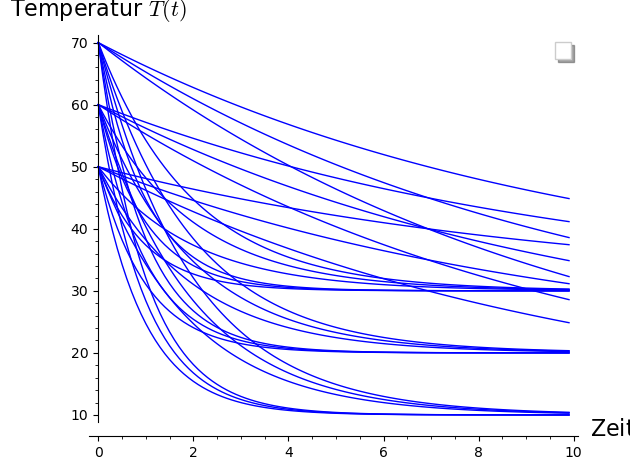

In [57]:
p.show()

In [58]:
#ex3 a
t = var('t')
x = function('x')(t)
r, x0 = var('r x0')


In [59]:
de = diff(x, t) - r * x == 0


In [61]:
initial_condition = {x: x0}


In [63]:
solution = desolve(de ,x, ics=initial_condition,ivar = t)

In [64]:
solution

_C*e^(r*t)

In [66]:
#ex3 b

def growth_model_solution(t, r_val, x0_val):
    return x0_val * exp(r_val * t)


In [67]:
t_values= srange(1820,1940,10)

In [82]:
r_values = [0.01, 0.05, 0.1]
x0_values = [9.6e6, 12.9e6, 17.1e6, 23.2e6, 31.4e6, 38.6e6, 50.2e6, 62.9e6, 76e6, 92e6, 106.5e6, 123.2e6]

In [77]:
p= Graphics()

In [83]:
for r_val in r_values:
    for x0_val in x0_values:
        x_values = [growth_model_solution(t, r_val, x0_val) for t in t_values]
        p += line(zip(t_values, x_values), color='blue')

In [84]:
p.axes_labels(['Jahr', 'Anzahl der Einwohner'])
p.legend(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


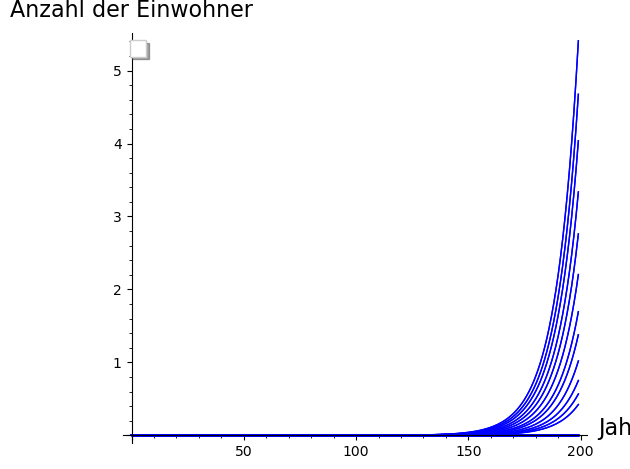

In [85]:
p.show()


In [86]:
x0 = 9.6 * 10^6
x1 = 12.9 * 10^6
t0 = 1820
t1 = 1830

In [87]:
r = (1 / (t1 - t0)) * log(x1 / x0)


In [88]:
r_value = r.n()

In [89]:
r_value


0.0295464212893836

In [90]:
def population_growth(t, r_val, x0_val):
    return x0_val * exp(r_val * (t - t0))


In [91]:
years = [1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930]
population_values = [9.6e6, 12.9e6, 17.1e6, 23.2e6, 31.4e6, 38.6e6, 50.2e6, 62.9e6, 76e6, 92e6, 106.5e6, 123.2e6]


In [93]:
t_values = srange(1820, 1940, 1)


In [94]:
x_values = [population_growth(t, r_value, x0_val) for t in t_values]


In [95]:
p = list_plot(list(zip(years, population_values)), color='red', legend_label='Gegebene Datenpunkte', size=30)


In [96]:
p += line(list(zip(t_values, x_values)), color='blue', legend_label='Wachstumsmodell')


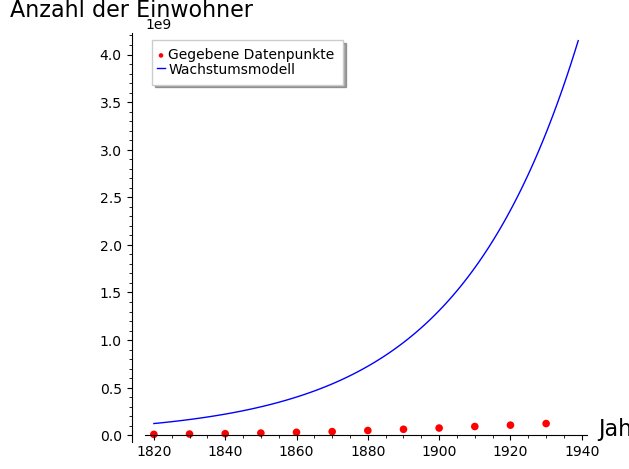

In [97]:
p.axes_labels(['Jahr', 'Anzahl der Einwohner'])
p.legend(True)
p.show()

In [98]:
#ex1 c

t_half = 5730

In [99]:
k = log(2) / t_half
k_value = k.n()  
k_value

0.000120968094338559

In [100]:
t_half = 5730

In [101]:
k= log(2) / t_half

In [102]:
k_value = k.n()

In [103]:
k_value

0.000120968094338559

In [104]:
#ex2 c

T1 = 32.22
T2 = 32.11
Tu = 20
Td = 37


In [105]:
k = -log((T2-Tu)/(T1-Tu))

In [106]:
k_value=k.n()

In [107]:
print("Decay constant k:", k_value)

Decay constant k: 0.00904239617844837


In [108]:
t1 = log((T1 - Tu) / (Td - Tu)) / (-k_value)


In [109]:
t1_value = t1.n()

In [110]:
print(t1_value)

36.5101665308163
